# Analysis of the Properties of Mushrooms
## Lab One: Exploring Table Data
### Luke Wood, Justin Ledford, Traian Pop
___

## Introduction
Mushrooms are a type of fungus found in many, if not all, parts of the world, and has been used throughout history in a variety of fields. These fungi are extracted for both their beneficial and harmful properties, and such, they are in constant demand. There is an entire subsect of biology dedicated to studying how mushrooms develop and evolve, providing us with as much data as we could want. After searching, we decided to focus on a specific set found on the UCI website, due to the variety of attributes in the report. 
___

## Business Understanding

### Data Background
<p align="justify">The data we have selected to study is the analysis of 23 different gilled mushroom species of the *Agaricus* and *Lepiota* Families. Originally, this was collected in order to discover a more efficient and accurate way to tell if a mushroom is edible or poisonous as part of a field guide. This information was found on the UCI, collected The Audubon Society Field Guide to North American Mushrooms (1981), and donated by Jeff Schlimmer.
<br><br>
The Aubudon Society collects information on over 700 different species of North American Mushrooms and compiles them in a concise and easy to understand handbook. Every aspect of a mushroom is detailed as to make it as simple as possible for anyone to differentiate one in the field. </p>


### Purpose
This kind of information is vital to many industries, ranging from tourism to healthcare. Having the knowledge of whether a mushroom is usable or not could save a starving hiker's life or speed up the process of developing medicines involving those materials. Although most poisonous mushrooms only cause minor symptoms such as vomiting and diarrhea, children or animals can develop symptoms such organ damage and, in some cases, death. The field is currently based on a lot of guesswork and tedious work, and even professional mushroomers can misidentify a specimen.

We want to analyze this data in order to discern a mushrooms edibleness by a combination of its properties.  
___


## Data Understanding


In [19]:
import pandas as pd
import numpy as np
import requests
import os

target_url = 'https://raw.githubusercontent.com/LukeWoodSMU/Mushroom-Classification/master/raw_data/descriptors.txt'
data = requests.get(target_url).text

def get_attribute_dictionary():
    # Loads from the descriptors file all attributes w/ mapping to their mappings
    return dict([(x.split(":")[0],dict([[y.split("=")[1].strip(),y.split("=")[0].strip()] for y in x.split(":")[1].split(",")])) for x in data.splitlines()])
    

def get_data_frame(remove_dups=False):
    attribute_names = [x.split(":")[0] for x in data.splitlines()]
    df = pd.read_csv('https://raw.githubusercontent.com/LukeWoodSMU/Mushroom-Classification/master/raw_data/agaricus-lepiota.data.txt',names=attribute_names)

    for col in df.columns:
        df[col] = df[col].astype('category')

    if(remove_dups):
        df = df.drop_duplicates()
        
    return df

[15 points] Load the dataset and appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, we only discuss a subset of relevant attributes.

![Cross section](http://michaelagleatonportfolio2014.weebly.com/uploads/2/6/4/0/26406357/570473033.gif "Cross section")
->The picture shows a typicaly Blue Milk Mushrooms.<- 
This has been added to aid in seeing where each attribute lies on the mushroom itself.

The following are our 23 categorical data attributes that will be examined in this report, split by data representation:
* One Hot Encoding
  1. Cap Information - Mushroom cap (pileus) attributes relating to shape, surface, and color
     a. Cap Shape 
     b. Cap Surface 
     c. Cap Color 
  4. Odor - aroma a mushroom gives off
  5. Gill Information - Mushroom gill (lamella) attributes relating to attachment, spacing, and color
      a. Gill Attachment
      b. Gill Spacing
      c. Gill Color
  8. Stalk Information - Mushroom Stalk (stipe) attributes relating to root, surface, and color
      a. Stalk Root
      b. Stalk Surface Above Ring
      c. Stalk Surface Below Ring
      d. Stalk Color Above Ring
      e. Stalk Color Below Ring
  13. Veil Color 
  14. Ring Number 
  15. Ring Type
  16. Spore Print Color 
  17. Population
  18. Habitat
* Binary
  1. Bruises -
  2. Gill Size -
  3. Stalk Shape -
  4. Veil Type - 
  5. Poisonous - attribute labeling if a mushroom is edible or poisonous

Although the above attributes can be assigned to those specific data representation, we decided to not go along with it as our data set was not memory intensive enough to require it. Leaving them in their categorical representation also allowed the data to be easier read and udnerstood. 

[15 points] Verify data quality: Explain any missing values or duplicate data. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).  

# Data Quality

## Missing Values
The data sets has 2480 missing values, all for one attribute, the stalk root. These missing values most likely exist because the stalk root is the only attribute that could not be visible unless the mushroom had been pulled out of the ground.

To deal with these missing values we can either eliminate the instances with missing values or eliminate the column altogether since it would be difficult to impute the values with this data set. Eliminating the column can be justified because the attribute is not relevant in the case of determining the edibility of the mushroom without removing it from the ground.

## Single Value Column
We also noticed that in the veil-type column, only one value was present.  This makes the column completely irrelevant.  This likely means that of the 20 species studied none of them had a veil-type of anything other than partial.

## Repeat Data
Due to there being 8124 rows and only 23 species of mushrooms, there will inevitably be lot of identical rows.  However, we decided that depending on what the intended use of the data is it could be beneficial to leave in the duplicate rows.

When implementing our function to read the DataFrame from a file, we allowed the option to remove duplicate values in order to easily analyze the dataset with and without duplicates. 

Below is a short piece of code showing what percentage of the data is unique.

In [20]:
#from preprocessing.shroom_dealer import get_data_frame

df = get_data_frame()
total_rows = len(df)

df.drop_duplicates(inplace=True)
no_dups = len(df)

# Initial Analysis

One of the first things we did was analyze the data by getting the ratios of an attribute value's occurence in all the instances to that value's occurence in the poisonous instances to determine which attributes had values that only or mostly occured in poisonous mushrooms

In [55]:
def get_hist_data():
    attr_map = get_attribute_dictionary()
    df = get_data_frame()

    hist_data = dict([(atr,None) for atr in attr_map])
    poison_hist_data = dict([(atr,None) for atr in attr_map])

    for x in attr_map:
        counts = dict([(attr_map[x][y],0) for y in attr_map[x]])
        poison_counts = dict([(attr_map[x][y],0) for y in attr_map[x]])

        for val, poison in zip(df[x],df["poisonous"]):
            counts[attr_map[x][val]]+=1
            if(poison == "p"):
                poison_counts[attr_map[x][val]]+=1
        hist_data[x] = counts
        poison_hist_data[x] = poison_counts

    return hist_data, poison_hist_data

#tf_tpf - Term Frquency to Poison Frequency
def get_tf_tpf():
    data,poison_data = get_hist_data()
    tf_tpf = {}

    for val in data:
        tf_tpf[val] = dict([(x,poison_data[val][x]/data[val][x]) for x in data[val] if data[val][x] != 0])
    return tf_tpf

counts, poison_counts = get_hist_data()

tf_tpf = {}
for val in counts:
    tf_tpf[val] = dict([(x,poison_counts[val][x]/counts[val][x]) for x in counts[val] if counts[val][x] != 0])

print(tf_tpf["odor"])

{'almond': 0.0, 'anise': 0.0, 'creosote': 1.0, 'fishy': 1.0, 'foul': 1.0, 'musty': 1.0, 'none': 0.034013605442176874, 'pungent': 1.0, 'spicy': 1.0}


As we can see, the correlations between certain values of the odor attribute and whether or not a mushroom is poisonous is 100%.  The only time that there is a question of whether or not a mushroom is poisonous is when the mushroom lacks an odor. From here we decided to start plotting the data to get a visual sense of the relationship between attributes.

# Visualizations

In [54]:
import matplotlib.pyplot as plt

## Comparative barcharts

In order to get a glimpse of what specific attribute values could be used to determine if a mushroom was edible or poisonous we generated some barcharts to compare the attribute values by poisonous and edible mushrooms.

The following function can be used to collect the frequencies of each attribute value for two attributes.

In [35]:
def attr_freqs(attr1, attr2):
    df = get_data_frame()

    labels1 = get_attribute_dictionary()[attr1]
    labels2 = get_attribute_dictionary()[attr2]

    data = []

    for a in df[attr1].cat.categories:
        column = df[attr2][df[attr1] == a].value_counts()
        data.append(column)

    observed = pd.concat(data, axis=1)
    observed.columns = [labels1[a] for a in df[attr1].cat.categories]

    return observed


attr_freqs('odor', 'poisonous')

,almond,creosote,foul,anise,musty,none,pungent,spicy,fishy
e,400,0,0,400,0,3408,0,0,0
p,0,192,2160,0,36,120,256,576,576


Next we can use this function to plot the comparative data.

In [36]:
def plot_comparative_data(attr, plot=True, save=False):
    data = attr_freqs(attr, 'poisonous')

    labels = get_attribute_dictionary()[attr]

    index = np.arange(data.shape[1])
    bar_width = 0.35
    opacity=0.4

    fig, ax = plt.subplots()

    plt.bar(index, data.loc['e',:].values, bar_width, align='center',
            color='b', label='edible', alpha=opacity)
    plt.bar(index + bar_width, data.loc['p',:].values, bar_width,
            align='center', color='r', label='poisonous', alpha=opacity)

    plt.xlabel('Attributes')
    plt.ylabel('Frequency')
    plt.title('Frequency by attribute and edibility ({})'.format(attr))
    plt.xticks(index + bar_width / 2, data.columns)

    plt.legend()

    plt.tight_layout()
    plt.show()
    plt.close()

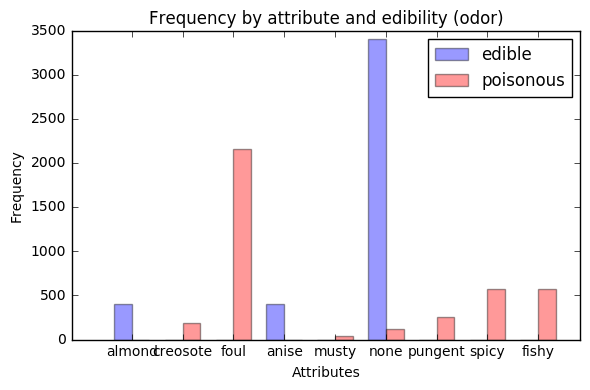

In [37]:
plot_comparative_data('odor')

From the plot we can see that any mushroom with a foul, spicy and fishy smell as almost certainly poisonous. No smell is almost always edible, but in some rare cases it can be posionous.

Let's take a look at spore print color.

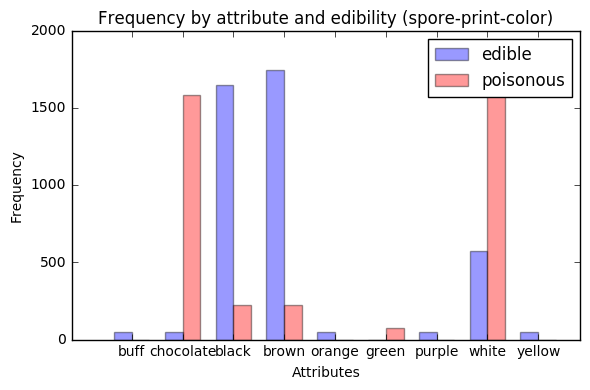

In [38]:
plot_comparative_data('spore-print-color')

We can see that chocolate and white mushrooms are usually poisonous so it is best to avoid those. Black or brown are usually edible, but not always.

## Determining an attribute's association with edibility

To determine association between attributes and edibility we used Pearson's chi-squared test on the frequency of attribute values and then ordered the attributes in descending order of the chi-squared statistic. The chi-squared test works by comparing the observed data to expected data (the null hypothesis which is an even distribution across each row and column) with the following equation,

$$
    \chi^2 = \sum^n_{i=1} \frac{ (O_i - E_i)^2 }{ E_i }
$$

where O is the observed data point and E is the expected data point.

With the following function we can get a contingency table of the expected and observed values of any two attributes:

In [39]:
def expected_data(observed):
    expected = np.zeros(observed.shape)

    total = observed.sum().sum()
    for j in [0, 1]:
        for i, col_total in enumerate(observed.sum()):
            row_total = observed.sum(axis=1)[j]
            expected[j][i] = row_total*col_total/total

    return pd.DataFrame(expected, index=observed.index,
                        columns=observed.columns)

In [40]:
o = attr_freqs('odor', 'poisonous')
o

,almond,creosote,foul,anise,musty,none,pungent,spicy,fishy
e,400,0,0,400,0,3408,0,0,0
p,0,192,2160,0,36,120,256,576,576


In [41]:
expected_data(o)

,almond,creosote,foul,anise,musty,none,pungent,spicy,fishy
e,207.188577,99.450517,1118.818316,207.188577,18.646972,1827.40325,132.600689,298.351551,298.351551
p,192.811423,92.549483,1041.181684,192.811423,17.353028,1700.59675,123.399311,277.648449,277.648449


Using these two tables for each attribute we can collect the chi-squared test statistic for each, and then sort them in descending order to rank the attributes by association with being poisonous or edible.

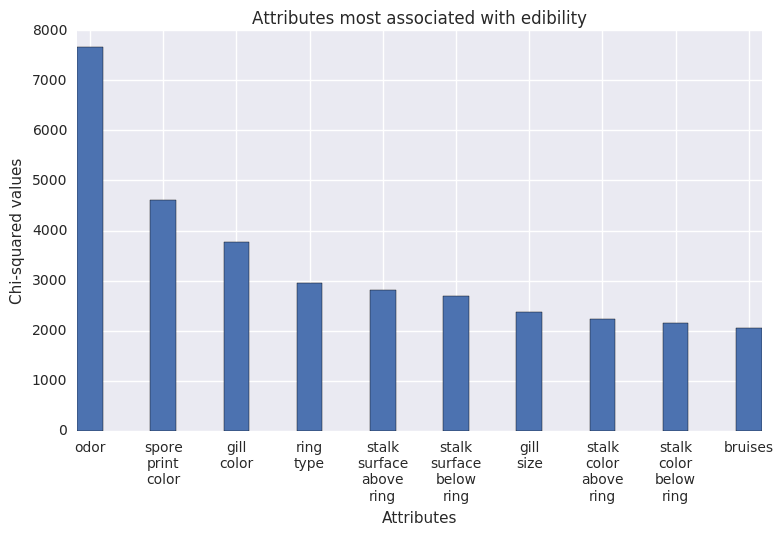

In [50]:
cat_names = get_attribute_dictionary().keys()

chisqrs = []
for cat in cat_names:
    if cat != 'poisonous':
        observed = attr_freqs(cat, 'poisonous')
        expected = expected_data(observed)
        chisqr = (((observed-expected)**2)/expected).sum().sum()
        chisqrs.append((chisqr, cat))

chisqrs = sorted(chisqrs)[::-1]
chisqrs = chisqrs[:10]
values = [d[0] for d in chisqrs]
labels = [d[1].replace("-", "\n") for d in chisqrs]

index = np.arange(len(chisqrs))
bar_width = .35
opacity=0.4

plt.title("Attributes most associated with edibility")
plt.bar(index, values, bar_width, align='center')
plt.xticks(index, labels)
plt.ylabel("Chi-squared values")
plt.xlabel("Attributes")
plt.autoscale()
plt.tight_layout()
plt.show()

As we can see from the plot, odor is the most associated attribute with edibility, followed by spore print color and gill color. These rankings seem to agree heavily with our comparative barcharts.

While this use of the chi-squared test statistic may not be the traditional use of finding the p-value and accepting or rejecting the null hypothesis to determine independence, it still provided us with a metric to rank the attributes by their association of edibility.

## Scatterplot

Next we decided to plot a scatterplot matrix of the top 5 most associated attributes with edibility. In order to plot categorical variables on a scatterplot we needed to add some jitter to the data. This was done by adding a random number between -0.167 and 0.167 to all the categorical codes.

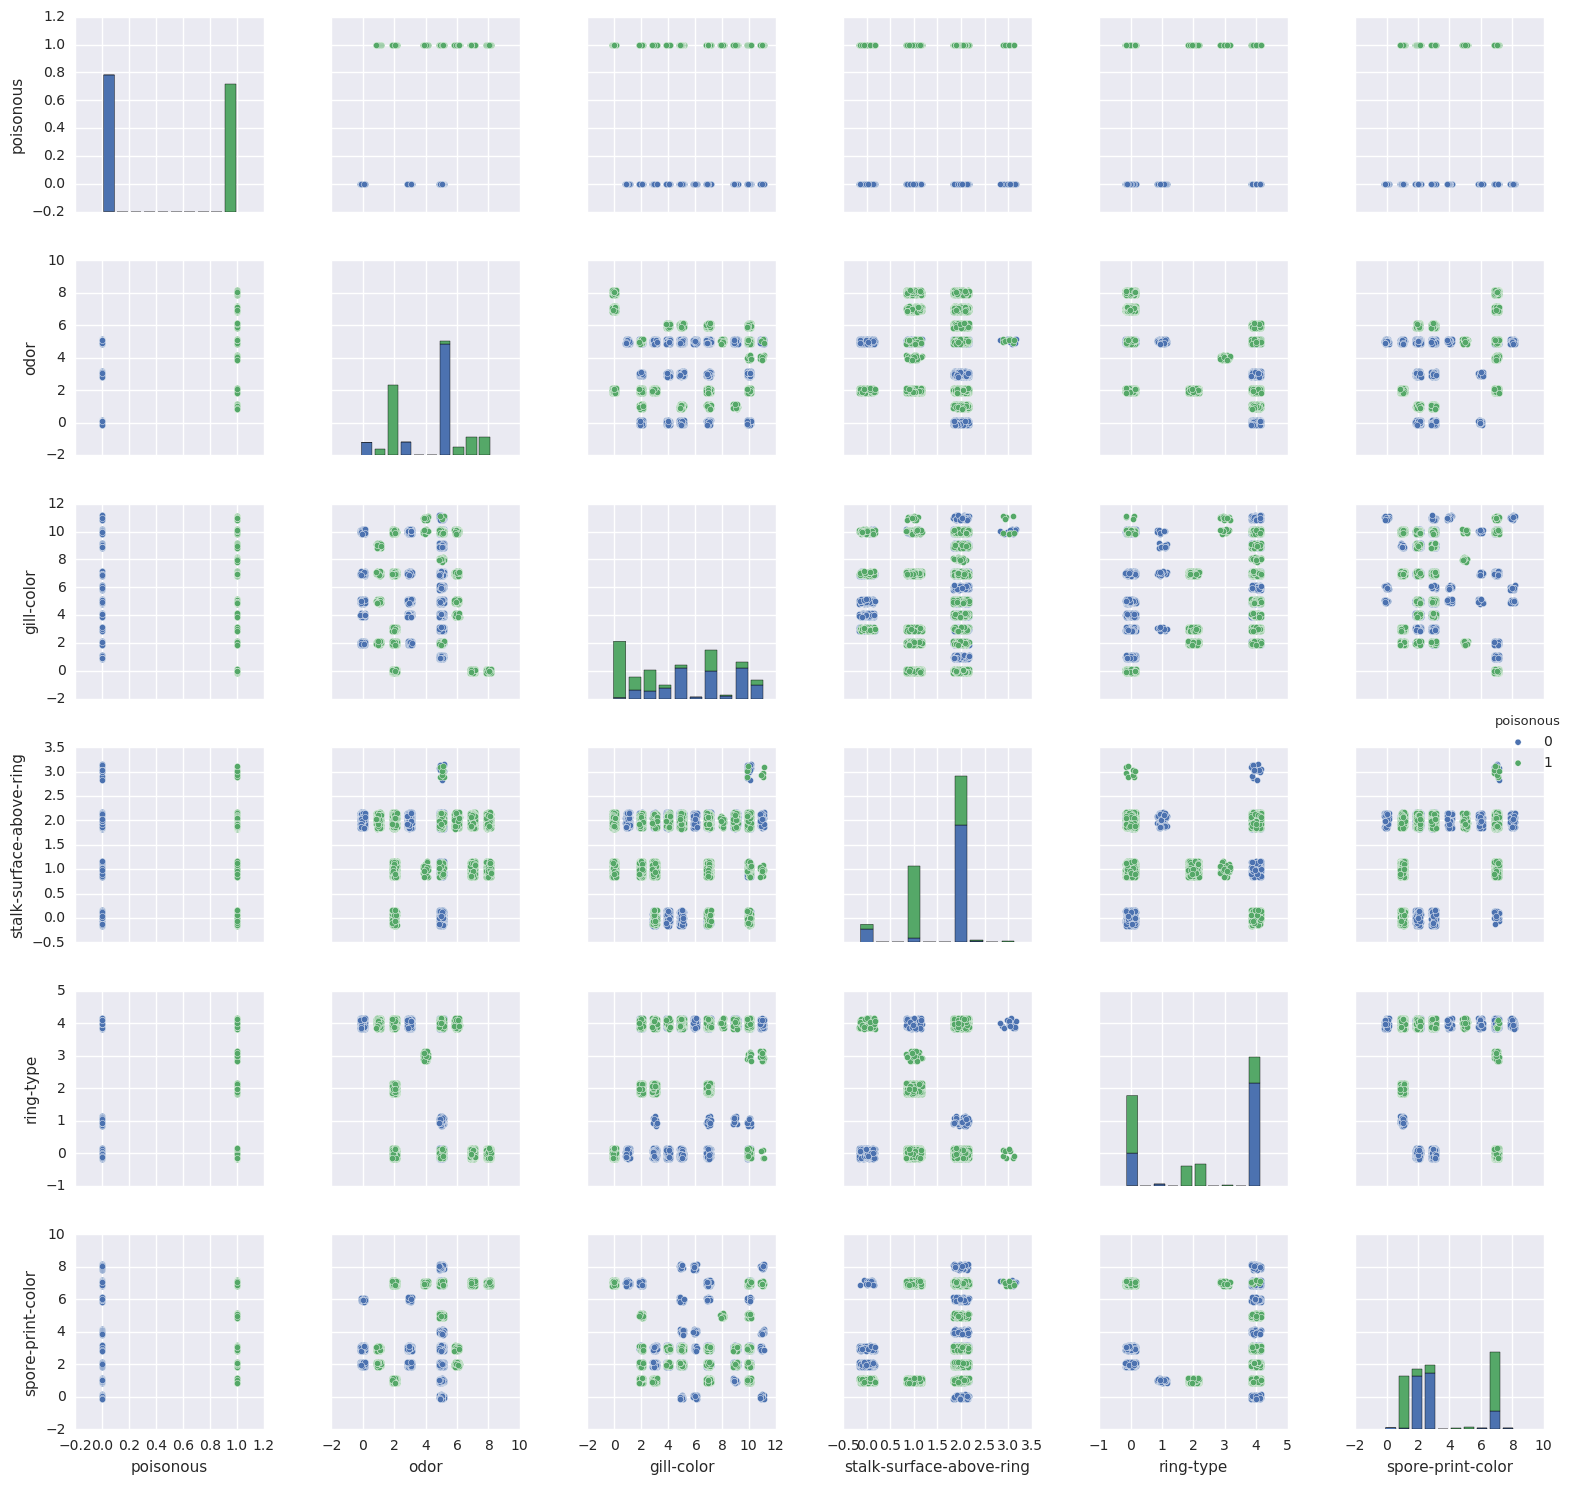

In [46]:
import seaborn as sns

df = get_data_frame()
for col in df:
    if col in ['odor', 'spore-print-color', 'gill-color', 'ring-type',
               'stalk-surface-above-ring']:
        df[col] = df[col].cat.codes + (np.random.rand(len(df),) - .5)/3
    elif col == 'poisonous':
        df[col] = df[col].cat.codes
    else:
        del df[col]

g = sns.pairplot(df, hue='poisonous')
plt.autoscale()
plt.tight_layout()
plt.show()
plt.close()

From the scatter plots we can cleary see how values of certain variables are grouped between poisonous and edible. Because the values were converted to the categorical codes to plot, we have generated a legend for the values of each attribute.

In [48]:
df = get_data_frame()
attr = get_attribute_dictionary()
labels = {}
for col in df:
        if col in ['odor', 'spore-print-color', 'gill-color', 'ring-type',
                               'stalk-surface-above-ring', 'poisonous']:
            labels[col] = [attr[col][c] for c in df[col].cat.categories] + \
                          (12-len(df[col].cat.categories))*[" "]
pd.DataFrame(labels)

,gill-color,odor,poisonous,ring-type,spore-print-color,stalk-surface-above-ring
0,buff,almond,edible,evanescent,buff,fibrous
1,red,creosote,poisonous,flaring,chocolate,silky
2,gray,foul,,large,black,smooth
3,chocolate,anise,,none,brown,scaly
4,black,musty,,pendant,orange,
5,brown,none,,,green,
6,orange,pungent,,,purple,
7,pink,spicy,,,white,
8,green,fishy,,,yellow,
9,purple,,,,,



## Heatmaps
One of our first visualizations was to create a heap map that showed the correlation between all possible attributes.  
![Heatmap of all Attributes](visualizations/singleton/fullheatmap.png)
As you can see, there are way too many attributes to look at this chart alone.  To see some of the more strongly correlated attributes more closely, we made heat maps displaying the correlation between every combibnation of two columns.  Below are some of the more interesting ones.
![Heatmap of all Attributes](visualizations/heatmaps/gill-attachment_and_veil-color.png)

![Heatmap of all Attributes](visualizations/heatmaps/odor_and_poisonous.png)
We found Odor and whether or not the Mushroom was poisonous to be a highly correlated feature.
![Heatmap of all Attributes](visualizations/heatmaps/stalk-shape_and_stalk-root.png)
We ended up dropping the stalk-root attribute due to 25% of the rows missing a stalk-root value.  We thought the heat map was still interesting enough to include it anyways.


In [1]:
from IPython.display import IFrame
#Visualization forked from: https://bl.ocks.org/mbostock/1044242
IFrame("./visualizations/edge-chart/index.html",width=1000,height=0)

## Conclusion

## Citations
For picture 1: http://michaelagleatonportfolio2014.weebly.com/blue-milk-mushroom.html